# Can we accurately predict insurance costs?

## 1. Objective
Through this notebook we'll try to accurately predict insurance costs.

## 2. Dataset
The dataset comes from Kaggle and orignially from the Machine Learning with R by Brett Lantz book from Packt Publishing. https://www.kaggle.com/datasets/mirichoi0218/insurance

## 3. Dictionary
* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance

## 4. Evaluation
We'll use MSE, MAE, R2 and ROC to evaluate how well the model predicts insurance costs.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. EDA

In [6]:
# 1.1 Let's load the dataset
df = pd.read_csv("Data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# Let's create an exploratory dataframe copy
df_exp = df.copy()

In [8]:
df_exp.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df_exp.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

As we can see there are no null values that have to be filled but we do have different data types.

In [11]:
df_exp.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
# Let's turn all the features into numbers for the next stage of exploration
df_encoded = df_exp.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

In [13]:
df_encoded

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


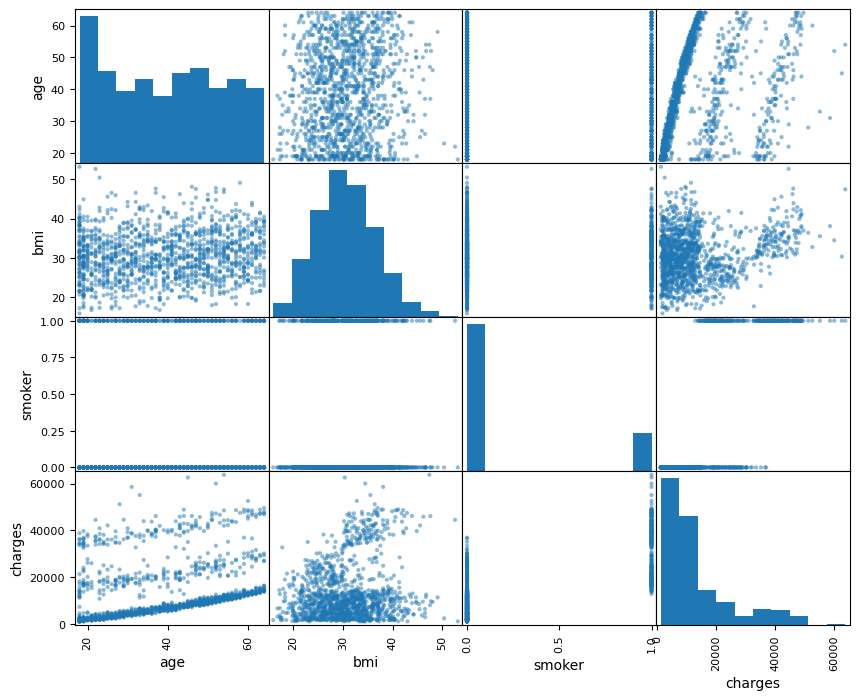

In [42]:
from pandas.plotting import scatter_matrix
attributes = ['age', 'bmi', 'smoker', 'charges']
scatter_matrix(df_encoded[attributes], figsize=(10, 8))
plt.show()

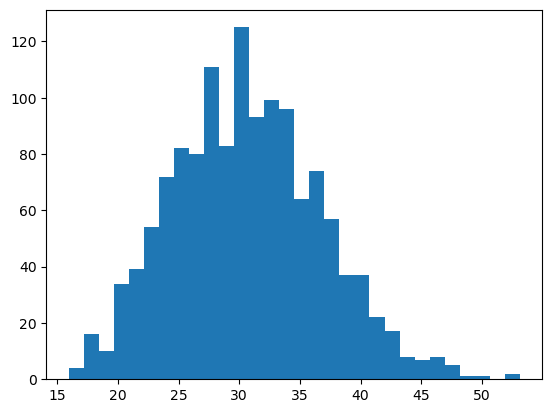

In [30]:
plt.hist(df_encoded.bmi, bins=30)
plt.show()

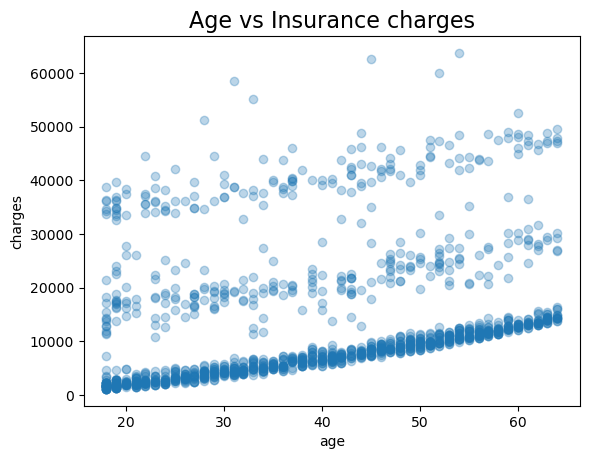

In [114]:
# 1.2 Let's plot some bivariate analysis
plt.scatter(df_exp.age, df_exp.charges, alpha=0.3)
plt.title('Age vs Insurance charges', fontsize=16)
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

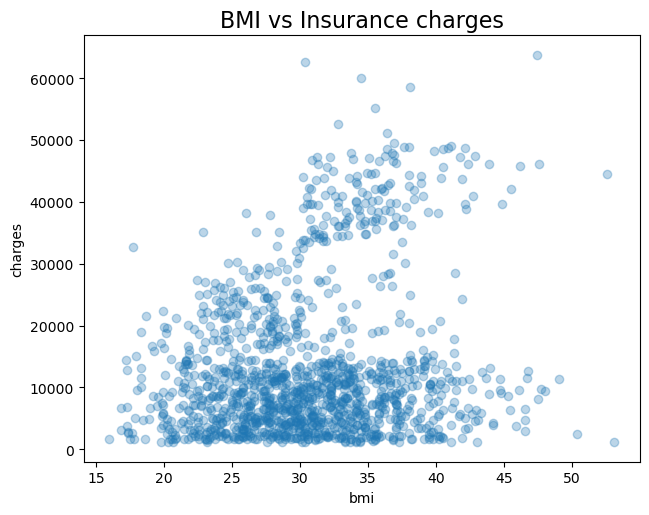

In [112]:
plt.scatter(df_encoded['bmi'], df_encoded['charges'], alpha=0.3)
plt.tight_layout()
plt.title('BMI vs Insurance charges', fontsize=16)
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

In [24]:
corr_matrix = df_encoded.corr()
corr_matrix['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

It's pretty obvious that the smoking factor is the main driver of insurance charges.

In [46]:
! pip install seaborn

# Let's see some distributions

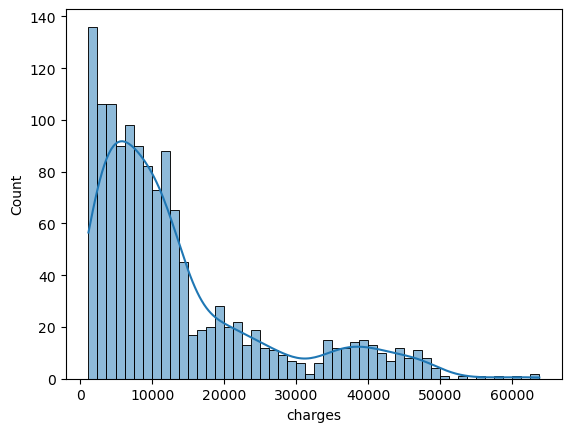

In [101]:
import seaborn as sns
sns.histplot(df_encoded['charges'], kde=True, bins=50);

<Axes: xlabel='smoker', ylabel='charges'>

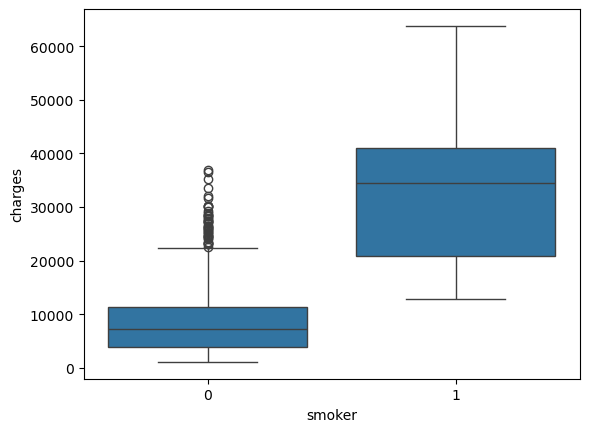

In [58]:
sns.boxplot(x='smoker', y='charges', data=df_encoded)

<Axes: xlabel='region', ylabel='charges'>

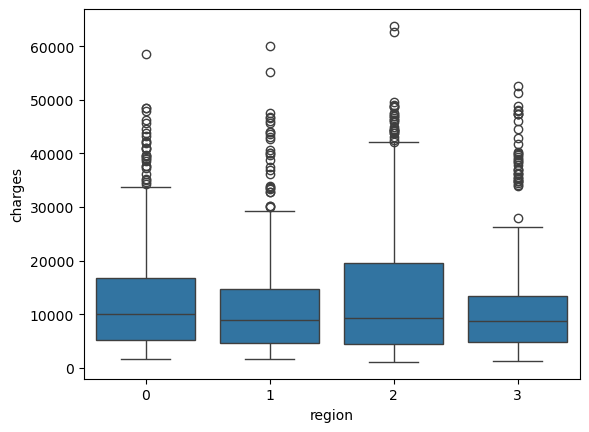

In [60]:
sns.boxplot(x='region', y='charges', data=df_encoded)

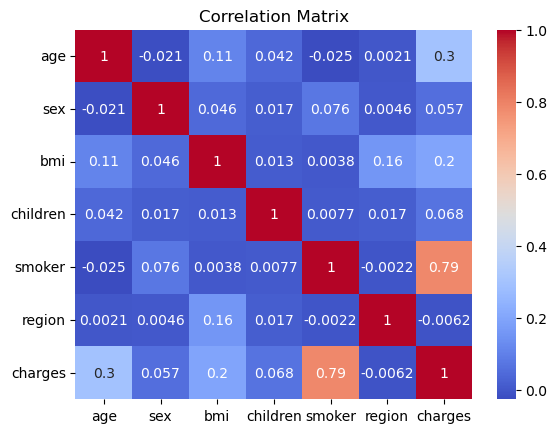

In [67]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [116]:
# Comparing groups
df_encoded.groupby('smoker')['charges'].mean()

smoker
0     8434.268298
1    32050.231832
Name: charges, dtype: float64

In [87]:
df_encoded.groupby(['smoker', 'sex'])['charges'].mean()

smoker  sex
0       0       8762.297300
        1       8087.204731
1       0      30678.996276
        1      33042.005975
Name: charges, dtype: float64

In [118]:
! git clone https://github.com/ionesh79/Insurance-Forecast.git

Cloning into 'Insurance-Forecast'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [120]:
! git commit -m "Initial commit + EDA"

fatal: not a git repository (or any of the parent directories): .git


# 2. Preprocessing

test test